<a href="https://colab.research.google.com/github/AbdelRahmanRifai87/smoker-status-model-prediction/blob/main/Smoker_Status_Prediction_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. import nessacary libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Read & visualize data


In [2]:
data = pd.read_csv('/content/insurance.csv')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/insurance.csv'

## 2. Exploratory Data Analysis



Checking how many rows and columns

In [ ]:
rows, columns = data.shape
print(f"The dataset contains {rows} rows and {columns} columns.")

The dataset contains 1338 rows and 7 columns.


Cheking some information about the dataset using info() where we can check if there is null values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


With discribe() we can get some valubale statistical information

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1335.000000,1338.000000,1338.000000
mean,39.207025,30.661423,1.094918,13270.422265
std,14.049960,6.101038,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.302500,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.687500,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Distribution of charges



Here we are ploting the distribution of medical charges

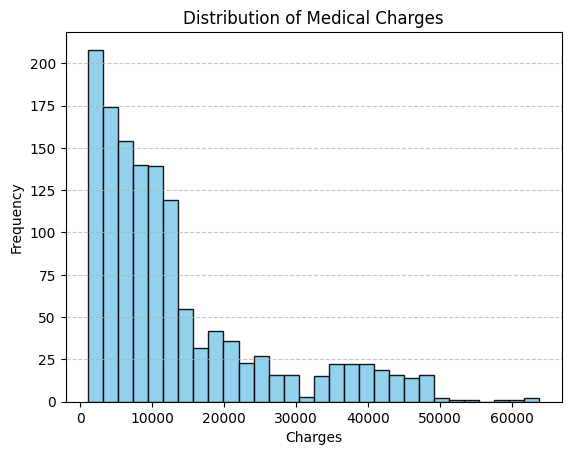

In [ ]:
plt.hist(data['charges'], bins=30, color='skyblue', edgecolor='black', alpha=0.9)
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Correlation between smoking and cost of treatment


here we are checking the number of smokers and non smokers in this dataset

In [ ]:
smokers = data[data['smoker'] == 'yes']
non_smokers = data[data['smoker'] == 'no']

num_smokers = smokers.shape[0]
num_non_smokers = non_smokers.shape[0]

print(f"Number of smokers: {num_smokers}")
print(f"Number of non-smokers: {num_non_smokers}")

Number of smokers: 274
Number of non-smokers: 1064


the distribution of charges for both smokers and non smokers

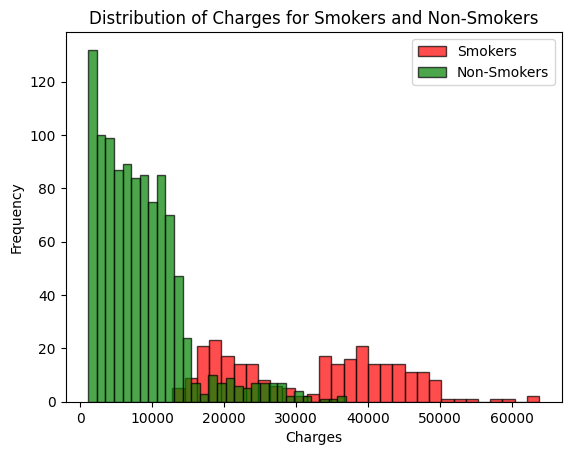

In [ ]:
plt.hist(smokers['charges'], bins=30, color='red', alpha=0.7, label='Smokers', edgecolor='black')
plt.hist(non_smokers['charges'], bins=30, color='green', alpha=0.7, label='Non-Smokers', edgecolor='black')

plt.title('Distribution of Charges for Smokers and Non-Smokers')
plt.xlabel('Charges')
plt.ylabel('Frequency')

plt.legend()

plt.show()

#### Correlation between age and cost of treatment



here we are checking the distribution of age

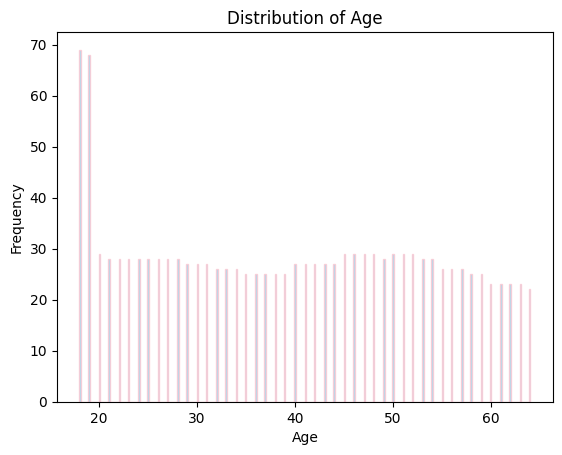

In [ ]:
plt.hist(data['age'], bins=300, color='skyblue', edgecolor='pink', alpha=0.7)

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

Here we are visualizing the cost of treatment by age

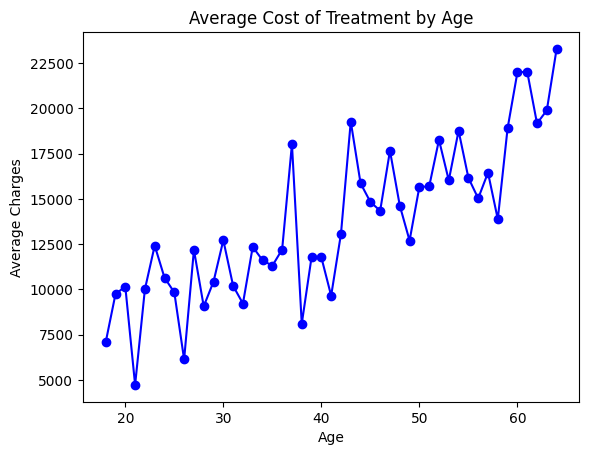

In [ ]:
age_charges = data.groupby('age')['charges'].mean()

plt.plot(age_charges.index, age_charges.values, marker='o', linestyle='-', color='blue')

plt.title('Average Cost of Treatment by Age')
plt.xlabel('Age')
plt.ylabel('Average Charges')

plt.show()

Let's check if smoking also affects this curve.



here we are plotting a scatter plot to visualize the cost of treeatment by age and smoking

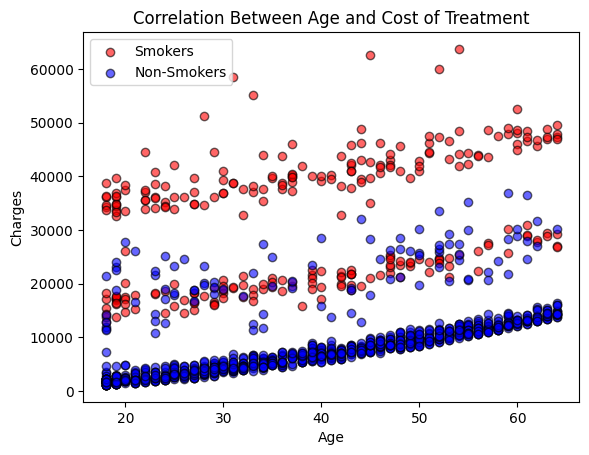

In [ ]:
plt.scatter(smokers['age'], smokers['charges'], color='red', alpha=0.6, label='Smokers', edgecolor='k')

plt.scatter(non_smokers['age'], non_smokers['charges'], color='blue', alpha=0.6, label='Non-Smokers', edgecolor='k')

plt.title('Correlation Between Age and Cost of Treatment')
plt.xlabel('Age')
plt.ylabel('Charges')

plt.legend()

plt.show()

distribution of BMI

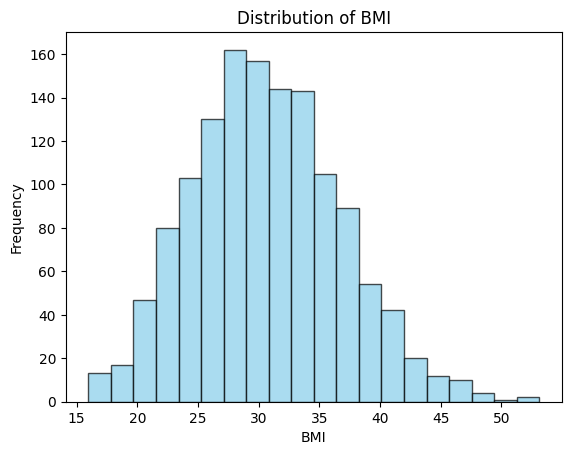

In [ ]:
plt.hist(data['bmi'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.show()

According to the chart above, obesity starts at BMI = 30. Let's investigate the impact of BMI on cost of treatment.


dividing the dataset into 4 sets underweight ,healthy, overweight and obese and checking the number of records in each of them

In [ ]:
underweight = data[data['bmi'] < 18.5]
healthy = data[(data['bmi'] >= 18.5) & (data['bmi'] < 25)]
overweight = data[(data['bmi'] >= 25) & (data['bmi'] < 30)]
obese = data[data['bmi'] >= 30]

num_underweight = underweight.shape[0]
num_healthy = healthy.shape[0]
num_overweight = overweight.shape[0]
num_obese = obese.shape[0]

print(f"Number of underweight examples: {num_underweight}")
print(f"Number of healthy examples: {num_healthy}")
print(f"Number of overweight examples: {num_overweight}")
print(f"Number of obese examples: {num_obese}")

Number of underweight examples: 20
Number of healthy examples: 225
Number of overweight examples: 385
Number of obese examples: 705


ploting the distribution of charges by the bmi obese, overweight and healthy to see which category have more charges

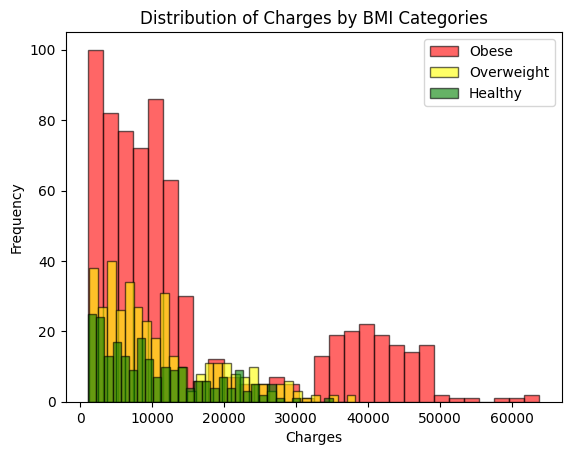

In [ ]:
plt.hist(obese['charges'], bins=30, color='red', alpha=0.6, label='Obese', edgecolor='black')
plt.hist(overweight['charges'], bins=30, color='yellow', alpha=0.6, label='Overweight', edgecolor='black')
plt.hist(healthy['charges'], bins=30, color='green', alpha=0.6, label='Healthy', edgecolor='black')

plt.title('Distribution of Charges by BMI Categories')
plt.xlabel('Charges')
plt.ylabel('Frequency')

plt.legend()

plt.show()

Patients with BMI above 30 spend more on treatment!

## 3. Data Preprocessing
"Garbage in, garbage out".






Checking number of null values

In [ ]:

missing_data = data.isnull().sum()

print("Missing data in each column:")
print(missing_data)

Missing data in each column:
age         0
sex         0
bmi         3
children    0
smoker      0
region      0
charges     0
dtype: int64


removing rows that contain null values since they are just 3 rows so it wont affect the dataset

In [ ]:
data = data.dropna()

recheking on the null values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1335 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1335 non-null   int64  
 1   sex       1335 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1335 non-null   int64  
 4   smoker    1335 non-null   object 
 5   region    1335 non-null   object 
 6   charges   1335 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.4+ KB


#### Remove unused columns


In [ ]:
data = data.drop(columns=['region'])

print(data.head())

   age     sex     bmi  children smoker      charges
0   19  female  27.900         0    yes  16884.92400
1   18    male  33.770         1     no   1725.55230
2   28    male  33.000         3     no   4449.46200
3   33    male  22.705         0     no  21984.47061
4   32    male  28.880         0     no   3866.85520


#### Convert Categorical columns to numerical





so that the model can read easily

In [ ]:
data['sex'] = data['sex'].map({'male': 0, 'female': 1})

print(data[['sex']].head())

   sex
0    1
1    0
2    0
3    0
4    0


In [ ]:
data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})

print(data[['smoker']].head())

   smoker
0       1
1       0
2       0
3       0
4       0


#### Normalization

Let's scale all the columns by dividing by the maximum

Also in normalizind the data our model can train more effectivly

In [ ]:
column_max = data.max()

Divide each column by its maximum value

In [ ]:
data = data / column_max
print(data.head())

        age  sex       bmi  children  smoker       charges
0  0.004639  1.0  0.009884      0.00     1.0  4.152030e-06
1  0.004395  0.0  0.011963      0.04     0.0  4.243161e-07
2  0.006836  0.0  0.011691      0.12     0.0  1.094130e-06
3  0.008057  0.0  0.008043      0.00     0.0  5.406016e-06
4  0.007812  0.0  0.010231      0.00     0.0  9.508658e-07


## 4. MultiLinear Regression Model Training



#### Data splits

Before training, we need to split data into training (80%) & testing (20%) using a random_state of 42.
Print the shape of your training and testing data.

splting the dataset ionto testing and traing sets where x contain the features without target calumn and y contains only target column to compere the result of the model's pridiction

In [ ]:
X = data.drop(columns=['charges'])
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (1068, 5)
Shape of X_test: (267, 5)
Shape of y_train: (1068,)
Shape of y_test: (267,)


### Optimization Using Gradient Descent

Here we are implementing the Gradient descent algorithm to optimize our multilineare regression model

In [ ]:
def Gradient_descent (x, y, learning_rate, nb_iterations, initial_a):

  #Test Your Zaka
  a0, a1, a2, a3, a4, a5 = initial_a
  m = len(y)

  costs = []

  for iteration in range(nb_iterations):
        y_pred = a0 + a1 * x[:, 0] + a2 * x[:, 1] + a3 * x[:, 2] + a4 * x[:, 3] + a5 * x[:, 4]

        error = y_pred - y

        gradient_a0 = (1 / m) * np.sum(error)
        gradient_a1 = (1 / m) * np.sum(error * x[:, 0])
        gradient_a2 = (1 / m) * np.sum(error * x[:, 1])
        gradient_a3 = (1 / m) * np.sum(error * x[:, 2])
        gradient_a4 = (1 / m) * np.sum(error * x[:, 3])
        gradient_a5 = (1 / m) * np.sum(error * x[:, 4])

        a0 -= learning_rate * gradient_a0
        a1 -= learning_rate * gradient_a1
        a2 -= learning_rate * gradient_a2
        a3 -= learning_rate * gradient_a3
        a4 -= learning_rate * gradient_a4
        a5 -= learning_rate * gradient_a5

        cost = (1 / (2 * m)) * np.sum(error ** 2)
        costs.append(cost)

  return costs, np.array([a0, a1, a2, a3, a4, a5])

Now that we have the function ready, we can use it to obtain the optimum coefficient values, and use them for future predictions.

Initialize the number of iteration as 10000, and the learning rate as 0.1. Then we will write the model equation we obtained

In [ ]:
initial_a = np.zeros(6)

nb_iterations = 10000
learning_rate = 0.1

if isinstance(X_train, pd.DataFrame):
    x_train = X_train.values
else:
    x_train = X_train


if isinstance(y_train, pd.Series):
    y_train = y_train.values

costs, final_a = Gradient_descent(x_train, y_train, learning_rate, nb_iterations, initial_a)

print("Final optimized coefficients (a):", final_a)

print(f"\nModel Equation: charges = {final_a[0]:.4f} + {final_a[1]:.4f} * age + {final_a[2]:.4f} * sex + {final_a[3]:.4f} * bmi + {final_a[4]:.4f} * children + {final_a[5]:.4f} * smoker")

Final optimized coefficients (a): [1.82566182e-06 3.15445843e-06 9.53685214e-08 1.17470326e-06
 3.87710422e-06 5.68303263e-06]

Model Equation: charges = 0.0000 + 0.0000 * age + 0.0000 * sex + 0.0000 * bmi + 0.0000 * children + 0.0000 * smoker


Plot the cost function

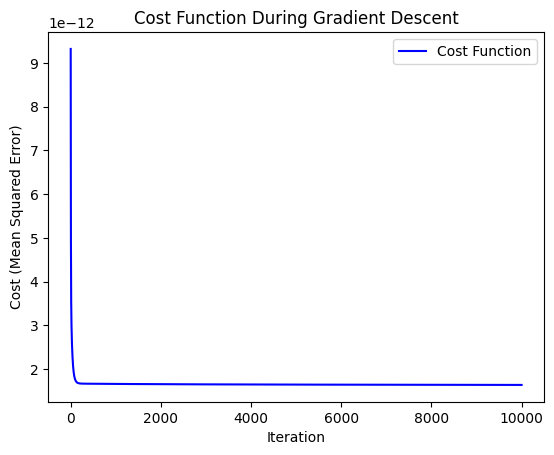

In [ ]:
plt.plot(range(len(costs)), costs, color='blue', label='Cost Function')

plt.title('Cost Function During Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Cost (Mean Squared Error)')

plt.legend()

plt.show()

###Linear Regression Model Evaluation

### Prediction Using Scikit Learn Library


Now to validate the results that we got, we will use the scikit learn library to give us the values of the coefficients that we got using Gradient Descent.
for this purpose, you have to build a linear regression mode, and fit it on the training data

In [ ]:
#Test Your Zaka
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

coefficients = linear_model.coef_
intercept = linear_model.intercept_

print("Intercept (a0):", intercept)
print("Coefficients (a1, a2, ...):", coefficients)

Intercept (a0): -2.780461456091059e-06
Coefficients (a1, a2, ...): [2.54313477e-04 9.97805962e-08 2.05655286e-04 3.33558462e-06
 5.74896416e-06]


####Evaluation using Scikit learn

Now we will compute the same metrics we computed earlier but using the sklearn library.

We start by calculating the predicted values for this model.

In [ ]:
#Test Your Zaka
y_pred_sklearn = linear_model.predict(X_test)

Now we will evaluate the sklearn model using the sklearn library to get error metrics (MAE, MSE, RMSE)

In [ ]:
#Test Your Zaka
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred_sklearn = linear_model.predict(X_test)

mae_sklearn = mean_absolute_error(y_test, y_pred_sklearn)

mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)

rmse_sklearn = np.sqrt(mse_sklearn)

print("Evaluation Metrics for Scikit-Learn Model:")
print(f"Mean Absolute Error (MAE): {mae_sklearn}")
print(f"Mean Squared Error (MSE): {mse_sklearn}")
print(f"Root Mean Squared Error (RMSE): {rmse_sklearn}")

Evaluation Metrics for Scikit-Learn Model:
Mean Absolute Error (MAE): 1.037112314898419e-06
Mean Squared Error (MSE): 2.066166051389182e-12
Root Mean Squared Error (RMSE): 1.4374164502290845e-06


Calculate the R2 value using the model.score() function

In [ ]:
#Test Your Zaka
r2_sklearn = linear_model.score(X_test, y_test)

print(f"R² Score for Scikit-Learn Model: {r2_sklearn}")

R² Score for Scikit-Learn Model: 0.8043792068989465
